In [1]:
import numpy as np
from matplotlib import pyplot as plt

from h2integrate.core.h2integrate_model import H2IntegrateModel

logging to stdout


In [2]:
# Create an H2Integrate model
model = H2IntegrateModel("h2i_wind_to_battery_storage.yaml")

demand_profile = np.ones(8760) * 50.0


# TODO: Update with demand module once it is developed
model.setup()
model.prob.set_val("battery.electricity_demand_in", demand_profile, units="MW")

# Run the model
model.run()

This is pdfTeX, Version 3.141592653-2.6-1.40.27 (TeX Live 2025) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
XDSM diagram written to connections_xdsm.pdf


HybridSim   : INFO     Set up SiteInfo with wind resource file: None
HybridSim   : INFO     Wind Layout set with 100 turbines for 830000.0 kw system capacity
HybridSim   : INFO     Wind Layout set with 100 turbines for 830000.0 kw system capacity
HybridSim   : INFO     WindPlant simulation executed with AEP 2439289694.897995


In [3]:
soc = model.prob.get_val("battery.SOC", units="percent")
print(np.where(soc > 91.0))

(array([ 849, 1629, 2122, 2123, 2340, 2539, 3546, 3547, 3548, 3549, 3550,
       3551, 3552, 3553, 3849, 3926, 3927, 3928, 3929, 3930, 3931, 3932,
       4148, 4149, 4150, 4151, 4152, 4153, 4154, 4155, 4156, 4157, 4158,
       4159, 4160, 4161, 4162, 4163, 4164, 4165, 4166, 4167, 4168, 4169,
       4170, 4171, 4172, 4173, 4174, 4175, 4176, 4177, 4178, 4179, 4180,
       4181, 4182, 4183, 4184, 4185, 4186, 4187, 4188, 4189, 4190, 4191,
       4192, 4193, 4194, 4195, 4196, 4197, 4198, 4199, 4200, 4201, 4376,
       4646, 4647, 4737, 4888, 4889, 5312, 5367, 5368, 5369, 5370, 5371,
       5372, 5373, 5374, 5375, 5376, 5377, 5378, 5379, 5380, 5381, 5382,
       6278, 7070, 7313, 7314, 7315, 7316, 7317, 7318, 7319, 7320, 7321,
       7322, 7323, 7324, 7325, 7326, 7327, 7328, 7329, 7330, 7331, 7332,
       7333, 7334, 7455, 7456, 7457, 7458, 7459, 7460, 7461, 7462, 7463,
       7464, 7465, 8007, 8370, 8563, 8564, 8565, 8566, 8567, 8568, 8569,
       8609, 8610, 8611, 8612, 8613, 8614, 8615, 8

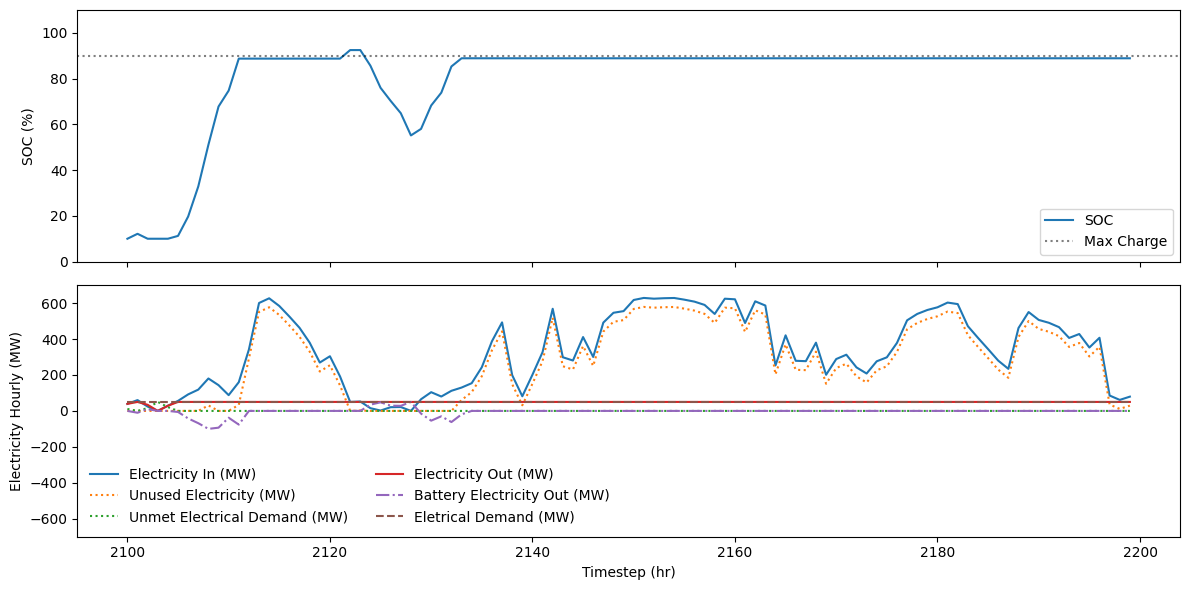

In [5]:
# Plot the results
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

start_hour = 2100
end_hour = 2200

ax[0].plot(
    range(start_hour, end_hour),
    model.prob.get_val("battery.SOC", units="percent")[start_hour:end_hour],
    label="SOC",
)
ax[0].set_ylabel("SOC (%)")
ax[0].set_ylim([0, 110])
ax[0].axhline(y=90.0, linestyle=":", color="k", alpha=0.5, label="Max Charge")
ax[0].legend()

ax[1].plot(
    range(start_hour, end_hour),
    model.prob.get_val("battery.electricity_in", units="MW")[start_hour:end_hour],
    linestyle="-",
    label="Electricity In (MW)",
)
ax[1].plot(
    range(start_hour, end_hour),
    model.prob.get_val("battery.unused_electricity_out", units="MW")[start_hour:end_hour],
    linestyle=":",
    label="Unused Electricity (MW)",
)
ax[1].plot(
    range(start_hour, end_hour),
    model.prob.get_val("battery.unmet_electricity_demand_out", units="MW")[start_hour:end_hour],
    linestyle=":",
    label="Unmet Electrical Demand (MW)",
)
ax[1].plot(
    range(start_hour, end_hour),
    model.prob.get_val("battery.electricity_out", units="MW")[start_hour:end_hour],
    linestyle="-",
    label="Electricity Out (MW)",
)
ax[1].plot(
    range(start_hour, end_hour),
    model.prob.get_val("battery.battery_electricity_out", units="MW")[start_hour:end_hour],
    linestyle="-.",
    label="Battery Electricity Out (MW)",
)
ax[1].plot(
    range(start_hour, end_hour),
    demand_profile[start_hour:end_hour],
    linestyle="--",
    label="Eletrical Demand (MW)",
)
ax[1].set_ylim([-7e2, 7e2])
ax[1].set_ylabel("Electricity Hourly (MW)")
ax[1].set_xlabel("Timestep (hr)")

plt.legend(ncol=2, frameon=False)
plt.tight_layout()
plt.savefig("plot.png")